In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/UFC.csv")

In [59]:
def get_fighter_stats(fighter):
  columns = [
  'event_name',
  'fighter',
  'opponent',
  'sig_str_landed',
  'sig_str_atmpted',
  'sig_str_acc',
  'winner'
  ]

  filter = data['r_name'].str.lower().str.contains(fighter) | data['b_name'].str.lower().str.contains(fighter)
  fighter_df = data[filter].copy()


  fighter_df['opponent'] = fighter_df.apply(
    lambda row: row['b_name'] if row['r_name'].lower() == fighter else row['r_name'],
    axis=1
  )

  fighter_df['is_red'] = fighter_df['r_name'].str.lower() == fighter
  fighter_df['sig_str_landed'] = fighter_df.apply(
    lambda row: row['r_sig_str_landed'] if row['is_red'] else row['b_sig_str_landed'],
    axis=1
  )
  fighter_df['sig_str_atmpted'] = fighter_df.apply(
    lambda row: row['r_sig_str_atmpted'] if row['is_red'] else row['b_sig_str_atmpted'],
    axis=1
  )
  fighter_df['sig_str_acc'] = fighter_df.apply(
    lambda row: row['r_sig_str_acc'] if row['is_red'] else row['b_sig_str_acc'],
    axis=1
  )

  fighter_df['fighter'] = fighter
  return fighter_df[columns]

In [60]:
khabib_stats = get_fighter_stats('khabib nurmagomedov')
conor_stats = get_fighter_stats('conor mcgregor')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5452\1935503662.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x, y], vert=False, patch_artist=True, labels=['Khabib', 'Conor'], showfliers=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x298ae137390>,
 'caps': [<matplotlib.lines.Line2D at 0x298ae137610>,
 'boxes': [<matplotlib.patches.PathPatch at 0x298ae137250>,
 'medians': [<matplotlib.lines.Line2D at 0x298ae137890>,
 'fliers': [<matplotlib.lines.Line2D at 0x298ae1379d0>,
 'means': []}

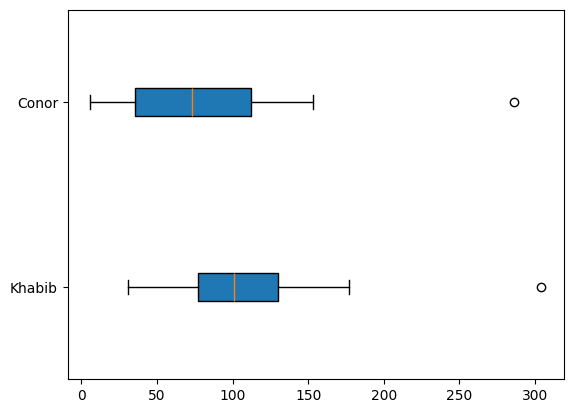

In [63]:
x = khabib_stats.loc[:,'sig_str_atmpted']
y = conor_stats.loc[:,'sig_str_atmpted']

plt.boxplot([x, y], vert=False, patch_artist=True, labels=['Khabib', 'Conor'], showfliers=True)

In [69]:
conor_stats[conor_stats['winner'] == 'Conor McGregor']

,event_name,fighter,opponent,sig_str_landed,sig_str_atmpted,sig_str_acc,winner
2852,UFC 246: McGregor vs. Cowboy,conor mcgregor,Donald Cerrone,19.0,26.0,73.0,Conor McGregor
4421,UFC 205: Alvarez vs McGregor,conor mcgregor,Eddie Alvarez,32.0,84.0,38.0,Conor McGregor
4526,UFC 202: Diaz vs. McGregor 2,conor mcgregor,Nate Diaz,164.0,286.0,57.0,Conor McGregor
4829,UFC 194: Aldo vs McGregor,conor mcgregor,Jose Aldo,5.0,6.0,83.0,Conor McGregor
5029,UFC 189: Mendes vs McGregor,conor mcgregor,Chad Mendes,46.0,92.0,50.0,Conor McGregor
5266,UFC Fight Night: McGregor vs Siver,conor mcgregor,Dennis Siver,64.0,119.0,53.0,Conor McGregor
5415,UFC 178: Johnson vs Cariaso,conor mcgregor,Dustin Poirier,9.0,29.0,31.0,Conor McGregor
5494,UFC Fight Night: McGregor vs Brandao,conor mcgregor,Diego Brandao,18.0,49.0,36.0,Conor McGregor
5973,UFC Fight Night: Shogun vs Sonnen,conor mcgregor,Max Holloway,53.0,153.0,34.0,Conor McGregor
6094,UFC on FUEL TV: Mousasi vs Latifi,conor mcgregor,Marcus Brimage,21.0,35.0,60.0,Conor McGregor


In [66]:
khabib_stats

,event_name,fighter,opponent,sig_str_landed,sig_str_atmpted,sig_str_acc,winner
2513,UFC 254: Khabib vs. Gaethje,khabib nurmagomedov,Justin Gaethje,26.0,80.0,32.0,Khabib Nurmagomedov
3025,UFC 242: Khabib vs. Poirier,khabib nurmagomedov,Dustin Poirier,22.0,41.0,53.0,Khabib Nurmagomedov
3517,UFC 229: Khabib vs. McGregor,khabib nurmagomedov,Conor McGregor,70.0,119.0,58.0,Khabib Nurmagomedov
3739,UFC 223: Khabib vs. Iaquinta,khabib nurmagomedov,Al Iaquinta,134.0,304.0,44.0,Khabib Nurmagomedov
3867,UFC 219: Cyborg vs. Holm,khabib nurmagomedov,Edson Barboza,89.0,177.0,50.0,Khabib Nurmagomedov
4425,UFC 205: Alvarez vs McGregor,khabib nurmagomedov,Michael Johnson,94.0,142.0,66.0,Khabib Nurmagomedov
4682,UFC on FOX: Teixeira vs Evans,khabib nurmagomedov,Darrell Horcher,75.0,105.0,71.0,Khabib Nurmagomedov
5676,UFC on FOX: Werdum vs Browne,khabib nurmagomedov,Rafael Dos Anjos,36.0,97.0,37.0,Khabib Nurmagomedov
5909,UFC 165: Jones vs Gustafsson,khabib nurmagomedov,Pat Healy,54.0,130.0,41.0,Khabib Nurmagomedov
6033,UFC 160: Velasquez vs Silva 2,khabib nurmagomedov,Abel Trujillo,23.0,40.0,57.0,Khabib Nurmagomedov


# Performance basic stats

Significant strikes

In [25]:
red_mean = data['r_sig_str_landed'].mean()
red_median = data['r_sig_str_landed'].median()
red_mean

np.float64(39.152717652717655)

In [28]:
blue_mean = data['b_sig_str_landed'].mean()
blue_median = data['b_sig_str_landed'].median()
blue_mean

np.float64(34.61351611351611)

Text(0.5, 1.0, 'Average of significant strikes landed per corner')

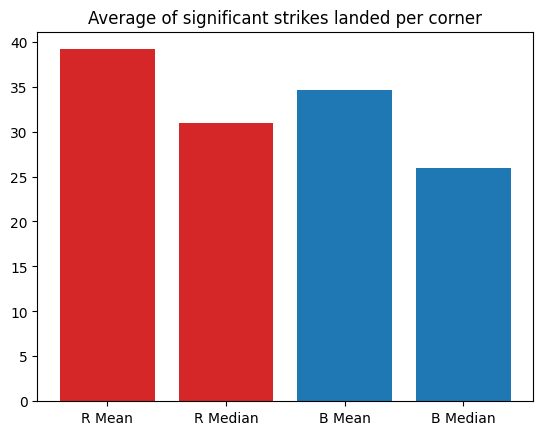

In [30]:
fig, ax = plt.subplots()

ax.bar(['R Mean', 'R Median', 'B Mean', 'B Median'], [red_mean, red_median, blue_mean, blue_median], color=['tab:red', 'tab:red', 'tab:blue', 'tab:blue'])

ax.set_title('Average of significant strikes landed per corner')